In [124]:
import numpy as np


In [128]:
def calc_t(f, xk, gk, dk, alpha, beta, s):
    t = s
    print(b - (A.dot(xk - t * dk)))
    while f(xk + t * dk) >= (f(xk) + (alpha * t * (gk(xk).T.dot(dk)))):
        t = beta * t
    return t

In [133]:
def analytic_center(A, b, x0):
    try:
        if np.any((A.dot(x0) - b) > 0):
            raise ValueError("x0 isn't in the interior of P")
        f = lambda x: -sum(np.log(b - (A.dot(x))))
        gf = lambda x: np.matmul(A.T, 1 / (b - A.dot(x)))
        hf = lambda x: np.matmul(A.T, np.matmul(np.diag(1 / ((b - A.dot(x)) ** 2)), A))
        xk = x0
        xk_hist = [x0]
        fs = [f(x0)]
        dk = None

        while np.linalg.norm(gf(xk)) >= (10 ** (-6)):

            dk = np.linalg.solve(hf(xk), -gf(xk))
            tk = calc_t(f, xk, gf, dk, alpha=0.25, beta=0.5, s=2)
            xk = xk + tk * dk
            xk_hist.append(xk)
            fs.append(f(xk))

        return xk_hist, fs

    except ValueError as err:
        print(err)


In [148]:
A = np.array([[2, 10],
              [1, 0],
              [-1, 3],
              [-1, -1]])
b = np.array([1, 0, 2, 2])
x0 = np.array([-1.99, 0])

xk, fs = analytic_center(A, b, x0)
xk = np.array(xk)

[ 5.01894114  2.00983608 -0.01005538 -0.00976298]
[ 5.04939036  2.02836197 -0.03056204 -0.02762861]
[ 5.08135313  2.07488567 -0.09541113 -0.06804385]
[ 4.69050296  2.14197656 -0.3200116  -0.08263154]
[ 1.8542101   2.03734034 -1.00348152  0.28470672]
[1.18735866 0.78076031 0.8069911  1.35665588]
[9.0085487  0.73695542 3.22343594 0.60958079]
[10.57920375  0.55947206  3.97860583  0.59450198]
[10.5848863   0.56693632  3.96836777  0.58796231]


In [149]:
xk.T[0]

array([-1.99      , -1.97016392, -1.91196587, -1.74904608, -1.3561156 ,
       -0.67489085, -0.62195613, -0.56445648, -0.56694869, -0.56695487])

C:\Users\yogev\AppData\Local\Temp\ipykernel_22676\97323421.py:5: RuntimeWarning: divide by zero encountered in log
  f = lambda x,y: -1*sum ([np.log(b[i]-A[i][0]*x-A[i][1]*y) for i in range (b.shape[0])])
C:\Users\yogev\AppData\Local\Temp\ipykernel_22676\97323421.py:5: RuntimeWarning: invalid value encountered in log
  f = lambda x,y: -1*sum ([np.log(b[i]-A[i][0]*x-A[i][1]*y) for i in range (b.shape[0])])


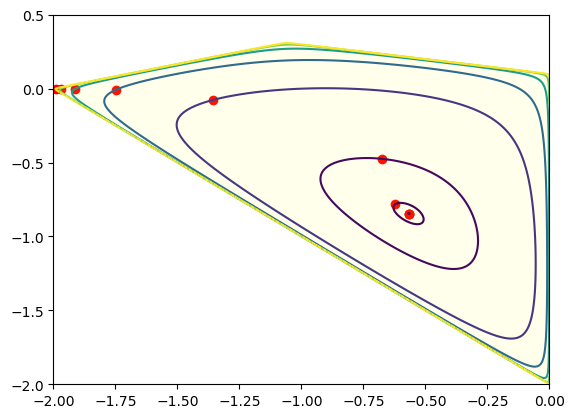

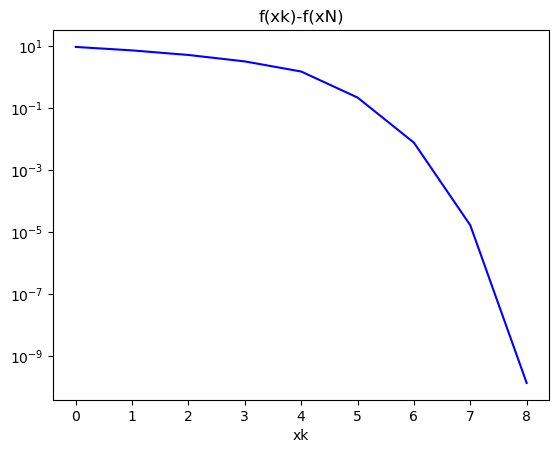

In [160]:

from matplotlib import patches
import matplotlib.pyplot as plt

def plot_Q1(xk, fs, A, b):
    f = lambda x,y: -1*sum ([np.log(b[i]-A[i][0]*x-A[i][1]*y) for i in range (b.shape[0])])
    x = np.linspace(-2, 0, 2000)
    y = np.linspace(-2, 0.5, 2000)
    pointsPolygon = np.array([[-2, 0], [0, -2], [0, 0.1], [-17 / 16, 5 / 16]])
    figure = patches.Polygon(pointsPolygon, facecolor = None, fill = True, color = "yellow")
    figure.set_alpha(0.08)
    plt.scatter(xk.T[0], xk.T[1], color="red")
    plt.gca().add_patch(figure)
    plt.xlim([-2, 0])
    plt.ylim([-2, 0.5])
    xv, yv = np.meshgrid(x, y)
    z = np.array(f(xv, yv))
    z[np.isnan(z)] = 10 ** 10
    z = z.reshape(xv.T.shape)
    fs.reverse()
    plt.contour(xv, yv, z, levels=fs)
    plt.show()
    fs.reverse()
    diffList = [fs[i] - fs[len(fs) - 1] for i in range(len(fs) - 1)]
    plt.semilogy(diffList, color="blue")
    plt.title('f(xk)-f(xN)')
    plt.xlabel('xk')
    plt.show()

plot_Q1(xk, fs, A, b)

In [153]:
x = np.linspace(-2, 0, 2000)
y = np.linspace(-2, 0.5, 2000)
xv, yx=np.meshgrid(x, y)

In [158]:
A[0][0]

2